In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('pokemon.csv')

In [4]:
df.head(10)

,Unnamed: 0,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,NaN,309,39,52,43,60,50,65
5,5,https://img.pokemondb.net/sprites/sword-shield...,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80
6,6,https://img.pokemondb.net/sprites/sword-shield...,6,Charizard,Fire,Flying,534,78,84,78,109,85,100
7,7,https://img.pokemondb.net/sprites/sword-shield...,6,Charizard Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100
8,8,https://img.pokemondb.net/sprites/sword-shield...,6,Charizard Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100
9,9,https://img.pokemondb.net/sprites/sword-shield...,7,Squirtle,Water,NaN,314,44,48,65,50,64,43


In [4]:
df.rename(columns={'0': 'id'}, inplace=True)
df.columns = df.columns.str.lower()
df.drop_duplicates('id', keep='first', inplace=True)
df['type2'].fillna(value='None', inplace=True)

In [5]:
df.head(5)

,unnamed: 0,image_url,id,names,type1,type2,total,hp,attack,defense,sp. atk,sp. def,speed
0,0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
4,4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,None,309,39,52,43,60,50,65
5,5,https://img.pokemondb.net/sprites/sword-shield...,5,Charmeleon,Fire,None,405,58,64,58,80,65,80


<AxesSubplot:xlabel='attack', ylabel='Count'>

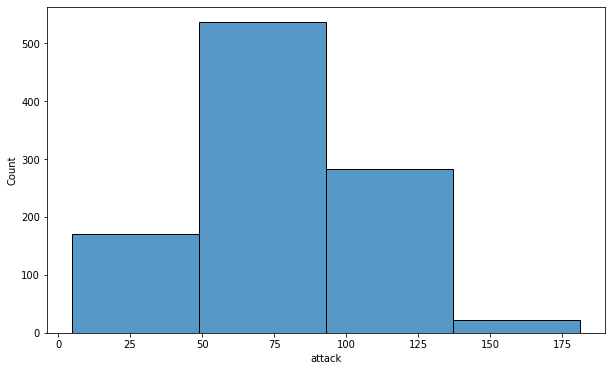

In [27]:
#Taking a look at the number of attack for different pokemons

#There are approximately 550 pokemons with an attack between 50 - 75.
#There are very few pokemons(approx. 20) pokemons with a very high attack greater than 150.
#There are approx. 280 pokemons with an average attack between 75 - 125.
# Approximately there are 180 pokemons with an attack between 25-50.
plt.figure(figsize=(10,6)) 
sns.histplot(df['attack'], bins = 4, palette = 'deep')

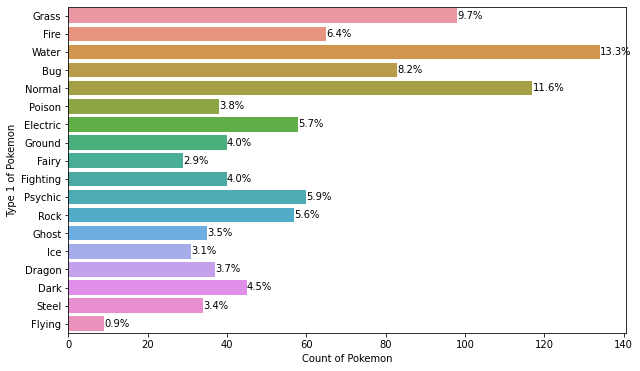

In [7]:
#Among the pokemons, water types as a larger proportion of (135 - 13.3%)
#Followed by the Normal type with (115- 11.6%)
plt.figure(figsize=(10,6))
ax = sns.countplot(y='type1',data=df);
plt.xlabel('Count of Pokemon')
plt.ylabel('Type 1 of Pokemon')
total = len(df['type1'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/1.5
        ax.annotate(percentage, (x, y))

<AxesSubplot:title={'center':'Primary Pokemons'}, xlabel='type1', ylabel='count'>

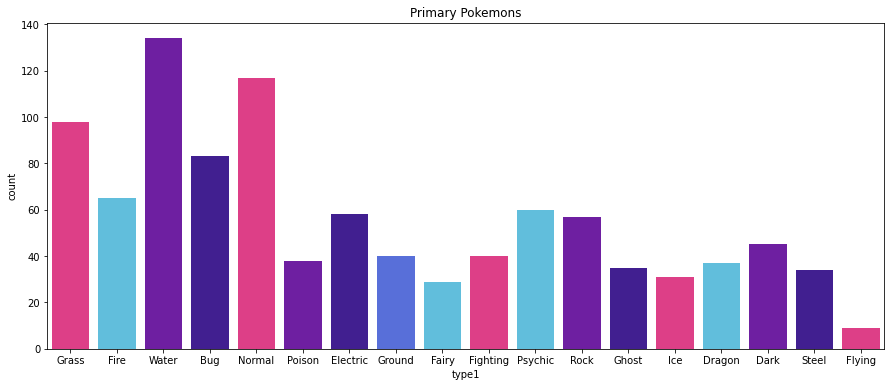

In [8]:
#Count of different pokemon types for the primary types
#From the two charts, you can see that for the primary type, Water is the most common, 
#followed by Normal and fairy with Flying being the least common. 
#When it comes to a Pokémon's secondary type, a larger proportion are not available,
#However, Flying is the most common.
plt.figure(figsize=(15,6))
plt.title('Primary Pokemons')

palette = ["#F72585", "#4CC9F0", "#7209B7","#3A0CA3", "#F72585", "#7209B7",
           "#3A0CA3", "#4361EE", "#4CC9F0", "#F72585","#4CC9F0","#7209B7", 
           "#3A0CA3","#F72585","#4CC9F0", "#7209B7","#3A0CA3", "#F72585"]

sns.countplot(data = df, x = 'type1', palette = palette)


<AxesSubplot:title={'center':'Secondary Pokemons'}, xlabel='type2', ylabel='count'>

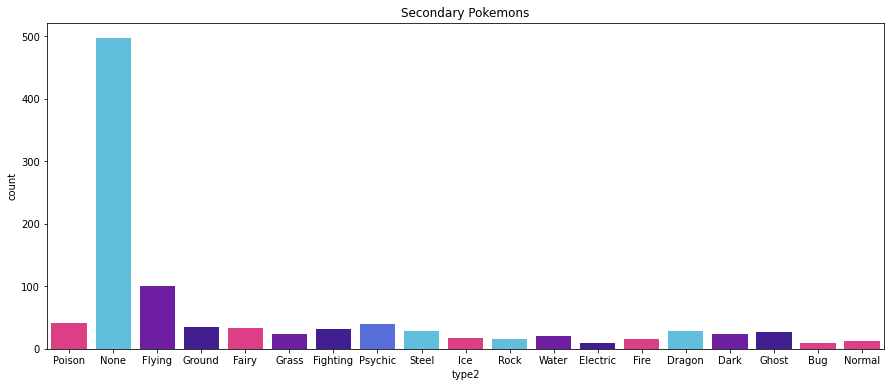

In [9]:
#count of different pokemons for the secondary types.
plt.figure(figsize=(15,6))
plt.title('Secondary Pokemons')

palette = ["#F72585", "#4CC9F0", "#7209B7","#3A0CA3", "#F72585", "#7209B7",
           "#3A0CA3", "#4361EE", "#4CC9F0", "#F72585","#4CC9F0","#7209B7", 
           "#3A0CA3","#F72585","#4CC9F0", "#7209B7","#3A0CA3", "#F72585"]

sns.countplot(data = df, x = 'type2', palette = palette)


In [11]:
#Calculating the Attack - Defense Ratio
df['Attack - Defense.'] = df['attack']/ df['defense']

#Filtering the top 30 pokemon with maximum Attack - Defense ratio
Max_Attack_def = df.sort_values('Attack - Defense.',ascending = False).head(30)
Max_Attack_def

,unnamed: 0,image_url,id,names,type1,type2,total,hp,attack,defense,sp. atk,sp. def,speed,Attack - Defense.
393,393,https://img.pokemondb.net/sprites/sword-shield...,318,Carvanha,Water,Dark,305,45,90,20,65,20,65,4.500000
953,953,https://img.pokemondb.net/sprites/sword-shield...,795,Pheromosa,Bug,Fighting,570,71,137,37,137,37,151,3.702703
502,502,https://img.pokemondb.net/sprites/sword-shield...,408,Cranidos,Rock,None,350,67,125,40,30,30,58,3.125000
394,394,https://img.pokemondb.net/sprites/sword-shield...,319,Sharpedo,Water,Dark,460,70,120,40,95,40,95,3.000000
477,477,https://img.pokemondb.net/sprites/sword-shield...,386,Deoxys Normal Forme,Psychic,None,600,50,150,50,150,50,150,3.000000
503,503,https://img.pokemondb.net/sprites/sword-shield...,409,Rampardos,Rock,None,495,97,165,60,65,50,58,2.750000
225,225,https://img.pokemondb.net/sprites/sword-shield...,172,Pichu,Electric,None,205,20,40,15,35,35,60,2.666667
673,673,https://img.pokemondb.net/sprites/sword-shield...,555,Darmanitan Standard Mode,Fire,None,480,105,140,55,30,55,95,2.545455
881,881,https://img.pokemondb.net/sprites/sword-shield...,731,Pikipek,Normal,Flying,265,35,75,30,30,30,65,2.500000
1095,1095,https://img.pokemondb.net/sprites/scarlet-viol...,921,Pawmi,Electric,None,240,45,50,20,40,25,60,2.500000


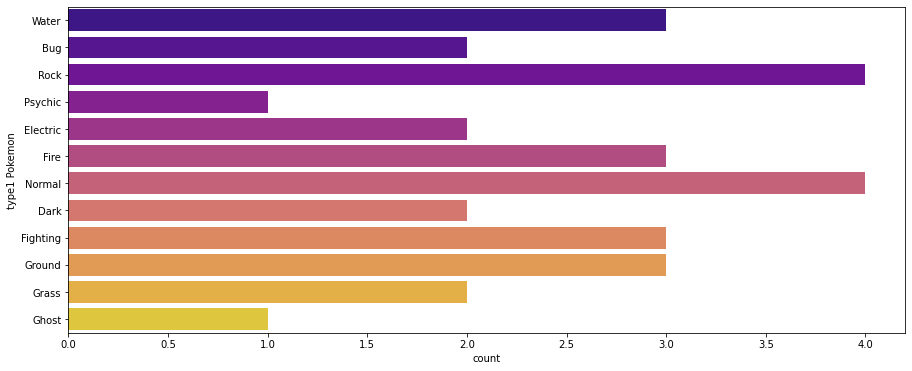

In [12]:

plt.figure(figsize=(15,6));
sns.countplot(y='type1',data=Max_Attack_def, palette = 'plasma');
plt.ylabel('type1 Pokemon');

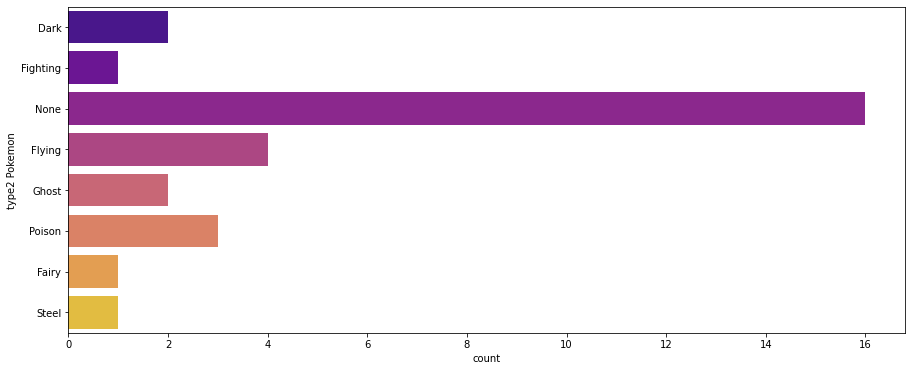

In [13]:
plt.figure(figsize=(15,6));
sns.countplot(y='type2',data=Max_Attack_def, palette = 'plasma');
plt.ylabel('type2 Pokemon');

<Figure size 1440x432 with 0 Axes>

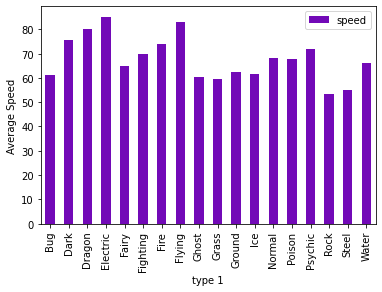

In [20]:
speed = df.groupby('type1')[['speed']].mean() #Average speed of each type of pokemon

plt.figure(figsize=(20, 6));
speed.plot.bar(color = '#7209B7');
plt.xlabel('type 1');
plt.ylabel('Average Speed');

<Figure size 1440x432 with 0 Axes>

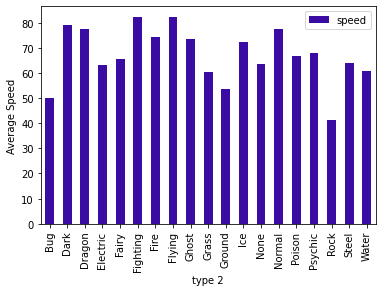

In [22]:
speed = df.groupby('type2')[['speed']].mean() #Average speed of each type of pokemon

plt.figure(figsize=(20, 6));
speed.plot.bar(color = '#3A0CA3');
plt.xlabel('type 2');
plt.ylabel('Average Speed');

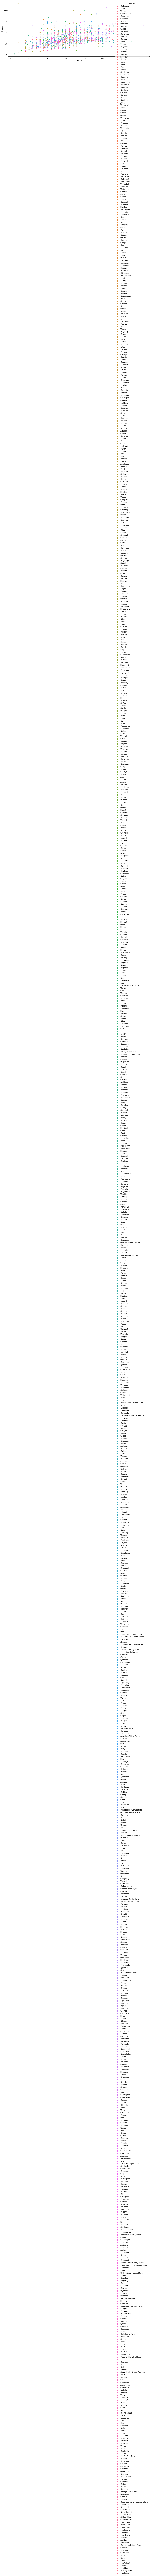

In [33]:
#Taking a look at the attack - defense ratio.
#Undoubteadly, majority of the pokemons have a defense ratio between 50 - 150.
#A larger proportion of the pokemons have  an attack from 50 - 100 and a defense of 50 - 100.
#It could be observed that fewer pokemons having an attack >150- To name a few: Altaria, Seviper, Lileep, Pichu,Baltoy...


plt.figure(figsize=(15,6))
sns.scatterplot(x=df.attack,
                y=df.defense,
                hue=df.names);

<AxesSubplot:xlabel='type2', ylabel='type1'>

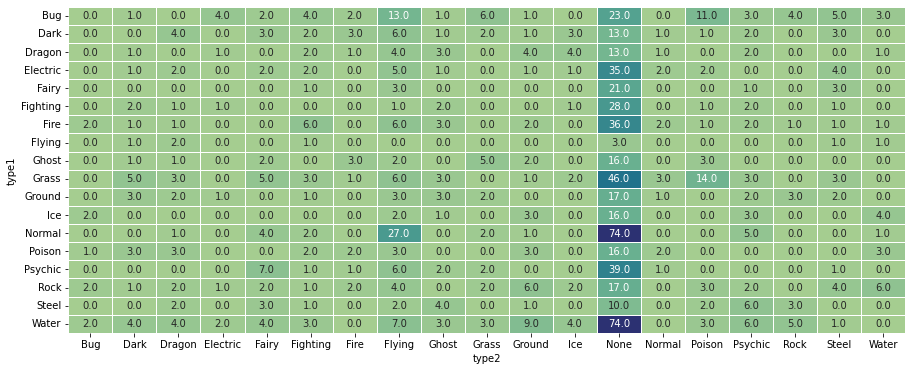

In [35]:
#Let's look at the heatmap for the different types
#We can see that having a combination of Flying-Normal pokemons is common, followed by Poison-Grass.
plt.figure(figsize=(15,6))
data = pd.crosstab(df['type1'], df['type2'])
sns.heatmap(data=data, cbar = False, linewidths = .6, annot = True, cmap = 'crest', fmt = '.1f')

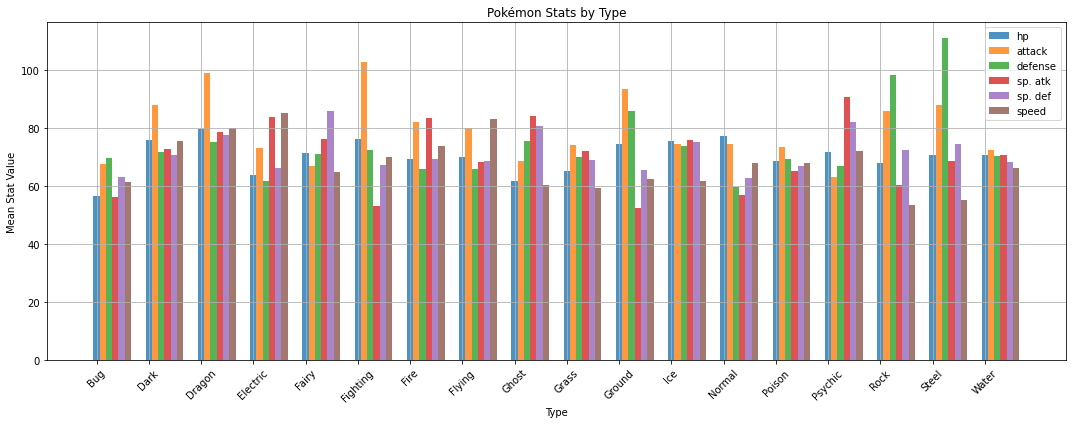

In [55]:
#Looking at individual type strengths and weeknesses..
import numpy as np
# Select the columns of interest
stats_data = df[['type1', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed']]

# Choose specific types for visualization
types = ['Water', 'Fire', 'Grass', 'Electric', 'Bug', 'Dark', 'Dragon', 'Fairy', 'Fighting',
         'Fire', 'Flying', 'Ghost', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel']

# Filter the data by selected types
filtered_data = stats_data[stats_data['type1'].isin(types)]

# Calculate the mean stats by type
mean_stats = filtered_data.groupby('type1').mean().reset_index()

# Set the x-axis labels and positions
labels = mean_stats['type1']
x = np.arange(len(labels))

# Set the stats to plot
stats_columns = ['hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed']
stats_values = mean_stats[stats_columns].values.T

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(15, 6))
bar_width = 0.12
opacity = 0.8

for i, stat in enumerate(stats_columns):
    ax.bar(x + (i * bar_width), stats_values[i], bar_width, alpha=opacity, label=stat)

ax.set_xlabel('Type')
ax.set_ylabel('Mean Stat Value')
ax.set_title('Pokémon Stats by Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
ax.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
